In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from nn import ShallowFeedForwardNeuralNetwork

In [2]:
nn = ShallowFeedForwardNeuralNetwork(hidden_size=(2, 120), output_size=(120, 1), lr=0.001)

In [10]:
X, y = make_blobs(centers=2, n_features=2, random_state=11)

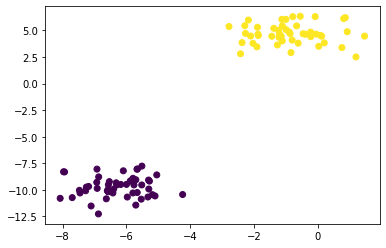

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [12]:
nn.train(X, y, 5)

In [13]:
ypred = nn.forward(X)

In [14]:
(np.around(ypred) == y).mean()

0.97

In [329]:
import numpy as np
import tqdm


class MLNN:
    
    def __init__(self, layers_sizes):
        self.layers_sizes = [self.set_bias_as_weight(sh) for sh in layers_sizes]
        self.layers = self.initialize_layer_weights()
        self.lr = 0.002

    @staticmethod
    def he_initialize(shape):
        he = np.random.normal(loc=0, scale=np.sqrt(1 / shape[0]))
        return he * np.random.randn(*shape)

    @staticmethod
    def set_bias_as_weight(shape):
        return shape[0] + 1, shape[1]

    @staticmethod
    def absorb_bias(vector):
        return np.hstack([vector, np.ones((vector.shape[0], 1))])

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def initialize_layer_weights(self):
        layers = []
        for size in self.layers_sizes:
            layers.append(self.he_initialize(size))
        return layers

    def _forward_layer(self, layer, x):
        x = self.absorb_bias(x)
        z = np.dot(x, layer)
        y = self.sigmoid(z)
        return y

    def _forward_layers(self, x):
        layer_forwards = [x]
        for layer in self.layers:
            x = self._forward_layer(layer, x)
            layer_forwards.append(x)
        return layer_forwards

    def forward(self, x):
        for layer in self.layers:
            x = self._forward_layer(layer, x)
        return x
    
    def backward_output(self, layer_forwards, ytrue):
        delta = (layer_forwards[-1] - ytrue) * layer_forwards[-1] * (1 - layer_forwards[-1])
        weights_vars = (1 / layer_forwards[-1].shape[0]) * np.dot(delta.T, layer_forwards[-2])
        return delta, weights_vars

    def _backward_layer(self, dH, layerO, yH):
        # y_o = sigma( theta_oh * y_h )
        yO = self._forward_layer(layerO, yH)
        yH = self.absorb_bias(yH)

        delta = dH * layerO.T * yO * yO
        weights_var = (1 / yO.shape[0]) * np.dot(delta[:, :-1].T, yH)
        return delta, weights_var

    def backward(self, x, ytrue):
        m = ytrue.shape[0]
        
        # [x, yh1, yh2, y_pred]
        lforwards = self._forward_layers(x)
        dh, wv = self.backward_output(lforwards, ytrue)
        
        wvs = [wv]
        
        # 3, 2, 1, 0
        for i in enumerate(range(len(self.layers), 0, -1)):
            # dh = d0 * theta_h * y_h2 * (1 - y_h2)
            dh = self._backward_layer(dh, self.layers[i + 1], lforwards[i] )
            wv = (1 / m) * self.layers[i]
            wvs.append(wv)


### Multilayer Neural Network

In [293]:
import matplotlib.pyplot as plt
import numpy as np
#from multi_layer_nn import MultilayerNeuralNetwork
from sklearn.datasets import make_blobs

In [294]:
X, y = make_blobs(centers=2, n_features=2, random_state=10)

In [295]:
layers_sizes = [
    (2, 10),
    (10, 10),
    (10, 1)
]

> Check if forward propagation is ok

In [330]:
mnn = MLNN(layers_sizes)

In [306]:
y0 = mnn._forward_layer(mnn.layers[0], X[0].reshape(1,-1))
y0

array([[9.99977548e-01, 1.25849449e-01, 7.51191170e-01, 9.99465163e-01,
        3.01010685e-03, 1.12581855e-02, 9.96213048e-01, 3.69984760e-07,
        1.38275916e-06, 1.72655559e-04]])

In [307]:
y1 = mnn._forward_layer(mnn.layers[1], y0)
y1

array([[0.35397736, 0.75947695, 0.60060936, 0.55070242, 0.70818419,
        0.37680938, 0.57216438, 0.45983955, 0.69506831, 0.60285845]])

In [308]:
y2 = mnn._forward_layer(mnn.layers[2], y1)
y2[0][0]

0.5192677977148098

In [309]:
forwards = mnn._forward_layers(X[0].reshape(1, -1))

In [310]:
forwards

[array([[3.67982584, 4.68165164]]),
 array([[9.99977548e-01, 1.25849449e-01, 7.51191170e-01, 9.99465163e-01,
         3.01010685e-03, 1.12581855e-02, 9.96213048e-01, 3.69984760e-07,
         1.38275916e-06, 1.72655559e-04]]),
 array([[0.35397736, 0.75947695, 0.60060936, 0.55070242, 0.70818419,
         0.37680938, 0.57216438, 0.45983955, 0.69506831, 0.60285845]]),
 array([[0.5192678]])]

In [311]:
mnn.layers[-2].shape

(11, 10)

In [312]:
mnn.backward(X, y)

TypeError: can only concatenate tuple (not "int") to tuple

In [313]:
mnn

In [331]:
ytrue = y.reshape(-1,1)
m = ytrue.shape[0]
        
        # [x, yh1, yh2, y_pred]
lforwards = mnn._forward_layers(X)
dh, wv = mnn.backward_output(lforwards, ytrue)
        
wvs = [wv]

In [332]:
wvs[0].shape

(1, 10)

In [ ]:
for i in enumerate(range(len(mnn.layers), 0, -1)):
    # dh = d0 * theta_h * y_h2 * (1 - y_h2)
    dh = mnn._backward_layer(dh, mnn.layers[i + 1], lforwards[i] )
    wv = (1 / m) * nn.layers[i]
    wvs.append(wv)

In [323]:
[s.shape for s in mnn.layers]

[(3, 10), (11, 10), (11, 1)]

In [335]:
dh2, wv2 = mnn._backward_layer(dh, mnn.layers[2], lforwards[2])

In [338]:
dh2.shape, wv2.shape

((100, 11), (10, 11))

In [339]:
dh1, wv1 = mnn._backward_layer(dh2, mnn.layers[1], lforwards[1])

ValueError: operands could not be broadcast together with shapes (100,11) (10,11) 

In [342]:
yH = lforwards[1]
yO = mnn._forward_layer(mnn.layers[1], yH)
yH = mnn.absorb_bias(yH)

delta = dh2 * mnn.layers[1].T * yO * yO
weights_var = (1 / yO.shape[0]) * np.dot(delta[:, :-1].T, yH)
return delta, weights_var

ValueError: operands could not be broadcast together with shapes (100,11) (10,11) 

In [344]:
LAYERS = mnn.layers
FORWARDS = lforwards

In [346]:
[s.shape for s in LAYERS]

[(3, 10), (11, 10), (11, 1)]

In [347]:
[s.shape for s in FORWARDS]

[(100, 2), (100, 10), (100, 10), (100, 1)]

In [348]:
["H1", "H2", "O"]

['H1', 'H2', 'O']

In [393]:
deltaO = (FORWARDS[-1] - ytrue) * FORWARDS[-1] * (1 - FORWARDS[-1])
deltaO.shape

(100, 1)

In [394]:
wvO = (1 / m) * np.dot(deltaO.T, FORWARDS[-2])
wvO.shape

(1, 10)

In [407]:
deltaH2 = deltaO * LAYERS[-1].T * mnn.absorb_bias(FORWARDS[-2]) * (1 - mnn.absorb_bias(FORWARDS[-2]))
deltaH2.shape

(100, 11)

In [408]:
wvH2 = (1/m) * np.dot(deltaH2[:, :-1].T, FORWARDS[-3])
wvH2.shape

(10, 10)

In [409]:
deltaH1 = np.dot(deltaH2[:, :-1], LAYERS[-2].T) * mnn.absorb_bias(FORWARDS[-3]) * (1 - mnn.absorb_bias(FORWARDS[-3]))

In [410]:
deltaH1.shape

(100, 11)

In [411]:
wv1 = (1/m) * np.dot(deltaH1[:, :-1].T, FORWARDS[-4])

In [413]:
wv1.shape

(10, 2)

In [415]:
np.dot(deltaO, LAYERS[-1].T).shape

(100, 11)

In [439]:
deltaO = (FORWARDS[-1] - ytrue) * FORWARDS[-1] * (1 - FORWARDS[-1])
wvO = (1 / m) * np.dot(deltaO.T, FORWARDS[-2])

deltaH2 = np.dot(deltaO, LAYERS[-1].T) * mnn.absorb_bias(FORWARDS[-2]) * (1 - mnn.absorb_bias(FORWARDS[-2]))
wvH2 = (1/m) * np.dot(deltaH2[:, :-1].T, FORWARDS[-3])

deltaH1 = np.dot(deltaH2[:, :-1], LAYERS[-2].T) * mnn.absorb_bias(FORWARDS[-3]) * (1 - mnn.absorb_bias(FORWARDS[-3]))
wv1 = (1/m) * np.dot(deltaH1[:, :-1].T, FORWARDS[-4])

In [427]:
[s.shape for s in LAYERS]

[(3, 10), (11, 10), (11, 1)]

In [454]:
dh_j = do = (FORWARDS[-1] - ytrue) * FORWARDS[-1] * (1 - FORWARDS[-1])
wvO = (1 / m) * np.dot(deltaO.T, FORWARDS[-2])

dhs = [do]<
wvs = [wvO]

for i in range(2):
    print(i)
    if i > 0:
        dh_j = dh_j[:, :-1]
    dh_i = np.dot(dh_j, LAYERS[-i-1].T) * mnn.absorb_bias(FORWARDS[-i - 2]) * (1 - mnn.absorb_bias(FORWARDS[-i -2]))
    wv_i = (1/m) * np.dot(dh_i[:, :-1].T, FORWARDS[-i - 3])
    dh_j = dh_i
    
    dhs.append(dh_j)
    wvs.append(wv_i)

0
1


In [455]:
[s.shape for s in wvs]

[(1, 10), (10, 10), (10, 2)]

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from sklearn.datasets import make_blobs


class Maths:
    @staticmethod
    def he_initialize(shape):
        he = np.random.normal(loc=0, scale=np.sqrt(1 / shape[0]))
        return he * np.random.randn(*shape)

    @staticmethod
    def set_bias_as_weight(shape):
        return shape[0] + 1, shape[1]

    @staticmethod
    def add_bias(vector):
        return np.hstack([vector, np.ones((vector.shape[0], 1))])

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))



class NeuralNet:
    
    def __init__(self, layers, **hyperparams):
        self.m = Maths()
        self.layers_sizes = [self.m.set_bias_as_weight(sh) for sh in layers]
        self.layers = self.initialize_layer_weights()
        self.lr = hyperparams.get("lr", 0.01)
        
    def initialize_layer_weights(self):
        layers = []
        for size in self.layers_sizes:
            layers.append(self.m.he_initialize(size))
        return layers

    def _forward_layer(self, layer, v):
        return self.m.sigmoid(np.dot(self.m.add_bias(v), layer))

    def get_layer_forwards(self, x):
        layer_forwards = [x]
        for layer in self.layers:
            x = self._forward_layer(layer, x)
            layer_forwards.append(x)
        return layer_forwards
    
    def backward(self, x, ytrue):
        m = x.shape[0]
        forwards = self.get_layer_forwards(x)
        
        # Output Layer Error
        d = (forwards[-1] - ytrue) * forwards[-1] * (1 - forwards[-1])
        wv = (1 / m) * np.dot(d.T, self.m.add_bias(forwards[-2]))
        
        ds = [d]
        wvs = [wv.T]
        
        for l in range(len(self.layers) - 1):
            d = np.dot(d, self.layers[-l - 1].T) * \
                   self.m.add_bias(forwards[-l - 2]) * \
                   (1 - self.m.add_bias(forwards[-l - 2]))
            d = d[:, :-1]
            wv = (1/m) * np.dot(d.T, self.m.add_bias(forwards[-l - 3]))
            ds.insert(0, d)
            wvs.insert(0, wv.T)
        return wvs
    
    def infer(self, x):
        for layer in self.layers:
            x = self._forward_layer(layer, x)
        return x
    
    def train(self, x, y, epochs, batch_size):
        y = y.reshape(-1, 1)
        m = x.shape[0]
        n_batches = int(np.floor(m / batch_size))
        rem_batch_size = m - n_batches * batch_size
        
        for _ in tqdm.tqdm(range(epochs)):
            batched_weights = []
            new_weights = []
            accumulated_weights = [0] * len(self.layers)
            
            for n in range(n_batches):    
                x_ = x[n * batch_size: (n + 1)* batch_size]
                y_ = y[n * batch_size: (n + 1) * batch_size]

                wvs = self.backward(x_, y_)
                batched_weights.append(wvs)
            
            # Sum all weights variations for each batch
            for i in range(0, len(batched_weights)):
                for j in  range(len(batched_weights[i])):
                    accumulated_weights[j] = accumulated_weights[j] + batched_weights[i][j]
            

            for weigths, wv in zip(self.layers, accumulated_weights):
                weigths = weigths - self.lr * wv
                new_weights.append(weigths)
            self.layers = new_weights
        return self.layers
    

In [30]:
nn = NeuralNet(
    layers=(
        (2, 30),
        (30, 30),
        (30, 1)
    )
)

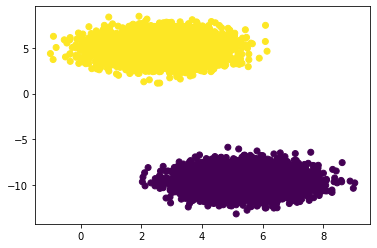

In [31]:
X, y = make_blobs(10000, centers=2, n_features=2, random_state=10)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [32]:
_ = nn.train(X, y, 100, 64)

100%|██████████| 100/100 [00:03<00:00, 28.46it/s]


In [34]:
ypred = nn.infer(X)

In [35]:
(np.around(ypred) == y.reshape(-1,1)).mean()

1.0

In [36]:
ypred

array([[0.93563895],
       [0.05106023],
       [0.96260922],
       ...,
       [0.05403756],
       [0.0534268 ],
       [0.05266552]])